In [32]:
#importing the necessary libraries 
!pip install emoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats #for getting the critical values
import emoji

#import matplotlib.font_manager as fm
#prop = fm.FontProperties(fname='/usr/share/fonts/truetype/emoji/EmojiOneColor-SVGinOT.ttf')

Defaulting to user installation because normal site-packages is not writeable


In [33]:
full_data = pd.read_stata('data_fig/data_python_2.dta')

In [34]:
full_data

,phase,treatment,session_id,period,group,case_id,female,decision_1,n_invest_subject,group_success1,session_size,num_fem_session
0,2.0,Baseline,7.0,1,3,76.0,Female,0,1.0,1,18.0,8.0
1,2.0,Baseline,7.0,2,6,76.0,Female,0,1.0,1,18.0,8.0
2,2.0,Baseline,7.0,3,4,76.0,Female,0,1.0,1,18.0,8.0
3,2.0,Baseline,7.0,4,1,76.0,Female,0,1.0,1,18.0,8.0
4,2.0,Baseline,7.0,5,4,76.0,Female,0,1.0,1,18.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4675,2.0,BaselineR,57.0,6,5,753.0,Female,0,5.0,0,18.0,9.0
4676,2.0,BaselineR,57.0,7,5,753.0,Female,0,5.0,1,18.0,9.0
4677,2.0,BaselineR,57.0,8,2,753.0,Female,1,5.0,1,18.0,9.0
4678,2.0,BaselineR,57.0,9,3,753.0,Female,1,5.0,1,18.0,9.0


In [35]:
def cols_for_error_bars(df):
    df['sqrt_count'] = df['count'].apply(lambda x: math.sqrt(x))
    df['critical values - t dist'] = scipy.stats.t.ppf((1 + 0.95)/2, df['count']-1)
    df['hi'] = df['mean'] + df['critical values - t dist']*\
                        (df['std']/df['sqrt_count'])
    df['low'] = df['mean'] - df['critical values - t dist']*\
                        (df['std']/df['sqrt_count'])
    df['ci- one tail'] = (df['hi']-df['low'])/2

# Figure A2(a): Total Investment, by treatment - Phase 2

In [36]:
#a dataframe with period and treatment as indices, with investment as super column,
#mean, std dev, count (number of obeservations) as sub-columns 

data_by_period_treatment = full_data.groupby(['period','treatment'], observed=True).\
                           agg({'n_invest_subject':['mean', 'std','count']})

#chosing crosssection, of period 1, and investment (supercolumn)
#look at the dataframes individually to get the idea

df_period1 = data_by_period_treatment.loc[1]['n_invest_subject']

In [37]:
data_by_period_treatment

n_invest_subject                
                             mean       std count
period treatment                                 
1      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
2      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
3      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
4      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
5      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
6      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
7      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
8      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
9      Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153
10     Baseline          2.546667  2.061837    75
       Positive          2.960000  1.962073    75
       Negative          2.800000  2.188838    90
       Pos_Neg           3.106667  1.928263    75
       BaselineR         2.666667  2.026145   153

In [38]:
#generating the necessary columns required to calculate confidence interval
cols_for_error_bars(df_period1)

In [39]:
df_period1

,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
treatment,,,,,,,,
Baseline,2.546667,2.061837,75,8.660254,1.992543,3.021052,2.072281,0.474386
Positive,2.960000,1.962073,75,8.660254,1.992543,3.411432,2.508568,0.451432
Negative,2.800000,2.188838,90,9.486833,1.986979,3.258443,2.341557,0.458443
Pos_Neg,3.106667,1.928263,75,8.660254,1.992543,3.550320,2.663014,0.443653
BaselineR,2.666667,2.026145,153,12.369317,1.975694,2.990294,2.343040,0.323627


In [40]:
positive = "Treatment" + emoji.emojize(" :smiling_face: ")
negative = "Treatment" + emoji.emojize(" :frowning_face: ")
positive_negative = "Treatment" + emoji.emojize(" :smiling_face:") + emoji.emojize(" :frowning_face: ")
treatment_emojis = ['Baseline',positive, negative, positive_negative, 'Baseline-R']

In [41]:
colors = sns.color_palette(['tab:blue','tab:green','tab:red','tab:orange', 'tab:purple'], n_colors=5)

C:\Users\priyo\AppData\Local\Temp\ipykernel_22468\3164905452.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_period1.index, y='mean', data = df_period1, palette= colors, zorder=2)


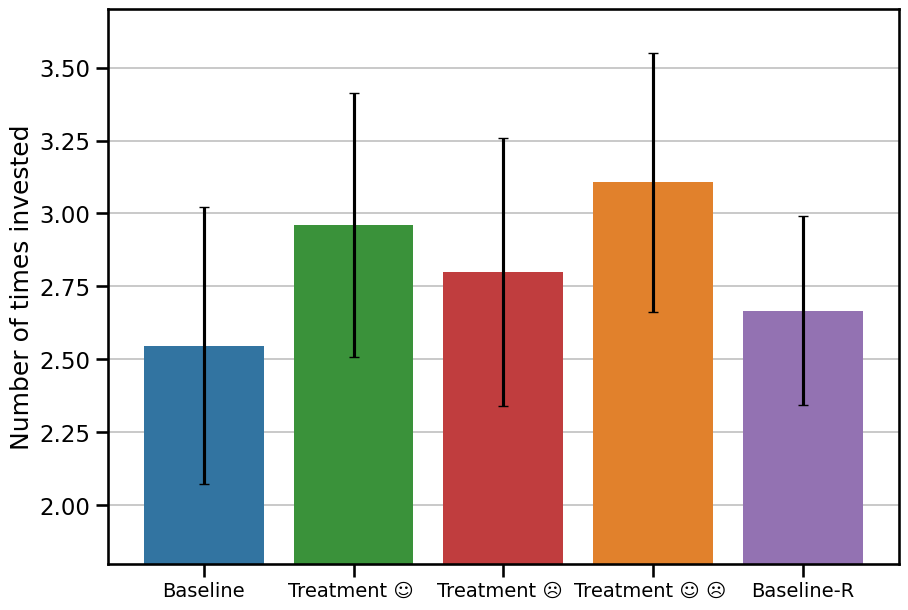

In [42]:
#plotting fig A2(a)

sns.set_context("talk")
fig = plt.figure(figsize=(10.2,7.2), dpi = 100)

plt.grid(axis= 'y', color='black', linestyle='-', linewidth=0.3, zorder=1)
sns.barplot(x= df_period1.index, y='mean', data = df_period1, palette= colors, zorder=2)
plt.errorbar(x= df_period1.index, y=df_period1['mean'], yerr=df_period1['ci- one tail'],\
            fmt = " ", label= "",ecolor='black',capsize=3.5, zorder=3)

#plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15))
plt.xlabel('\n')
plt.ylabel('Number of times invested')
plt.xticks(range(len(df_period1.index)), treatment_emojis , fontsize=14)
plt.ylim([1.8,3.7])

plt.show()

fig.savefig('output_fig/Figure A2(a).png', bbox_inches='tight', dpi=150)

# Figure A2(b) : Group Investment, by treatment - Phase 2

In [43]:
# 1. Collapse (group) your full_data
#    This produces a MultiIndex DataFrame with the mean of group_success1.
group_cols = ['treatment', 'phase', 'session_id', 'group', 'period']
df = (
    full_data
    .groupby(group_cols, observed=True)  # explicit observed argument to silence warnings
    .agg({'group_success1': 'mean'})
    .reset_index()
)
df

,treatment,phase,session_id,group,period,group_success1
0,Baseline,2.0,7.0,1,1,1.0
1,Baseline,2.0,7.0,1,2,0.0
2,Baseline,2.0,7.0,1,3,0.0
3,Baseline,2.0,7.0,1,4,1.0
4,Baseline,2.0,7.0,1,5,0.0
...,...,...,...,...,...,...
1555,BaselineR,2.0,57.0,6,6,1.0
1556,BaselineR,2.0,57.0,6,7,1.0
1557,BaselineR,2.0,57.0,6,8,1.0
1558,BaselineR,2.0,57.0,6,9,1.0


In [44]:
df['group_success1'] = (df['group_success1'] > 0).astype(int)



In [45]:
df

,treatment,phase,session_id,group,period,group_success1
0,Baseline,2.0,7.0,1,1,1
1,Baseline,2.0,7.0,1,2,0
2,Baseline,2.0,7.0,1,3,0
3,Baseline,2.0,7.0,1,4,1
4,Baseline,2.0,7.0,1,5,0
...,...,...,...,...,...,...
1555,BaselineR,2.0,57.0,6,6,1
1556,BaselineR,2.0,57.0,6,7,1
1557,BaselineR,2.0,57.0,6,8,1
1558,BaselineR,2.0,57.0,6,9,1


In [46]:
# Using named aggregation for flat columns
df_summary = (
    df
    .groupby('treatment', observed=True)
    .agg(
        mean=('group_success1', 'mean'),
        std=('group_success1', 'std'),
        count=('group_success1', 'count')
    )
    .reset_index()
)

print(df_summary)

   treatment   mean       std  count
0   Baseline  0.764  0.425474    250
1   Positive  0.888  0.315999    250
2   Negative  0.840  0.367219    300
3    Pos_Neg  0.932  0.252251    250
4  BaselineR  0.800  0.400393    510


In [47]:
cols_for_error_bars(df_summary)


In [48]:
df_summary

,treatment,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
0,Baseline,0.764,0.425474,250,15.811388,1.969537,0.816999,0.711001,0.052999
1,Positive,0.888,0.315999,250,15.811388,1.969537,0.927362,0.848638,0.039362
2,Negative,0.840,0.367219,300,17.320508,1.967930,0.881723,0.798277,0.041723
3,Pos_Neg,0.932,0.252251,250,15.811388,1.969537,0.963421,0.900579,0.031421
4,BaselineR,0.800,0.400393,510,22.583180,1.964636,0.834832,0.765168,0.034832


C:\Users\priyo\AppData\Local\Temp\ipykernel_22468\3692933818.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_summary.index, y='mean', data = df_summary, palette= colors, zorder=2)


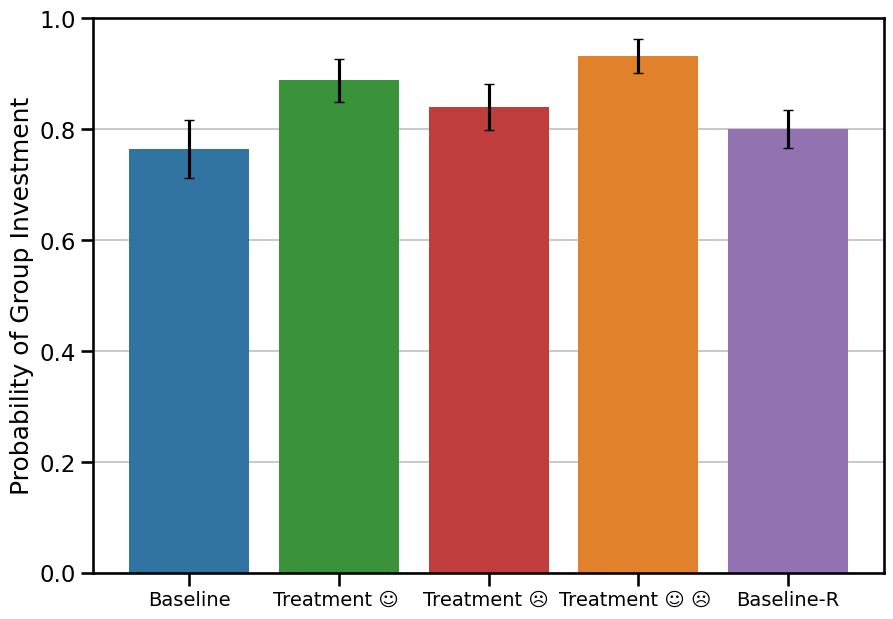

In [49]:
# Assuming df looks like this:
# treatment | mean | std | count
sns.set_context("talk")
fig = plt.figure(figsize=(10.2,7.2), dpi = 100)

plt.grid(axis= 'y', color='black', linestyle='-', linewidth=0.3, zorder=1)
sns.barplot(x= df_summary.index, y='mean', data = df_summary, palette= colors, zorder=2)
plt.errorbar(x= df_summary.index, y=df_summary['mean'], yerr=df_summary['ci- one tail'],\
            fmt = " ", label= "",ecolor='black',capsize=3.5, zorder=3)

#plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15))
plt.xlabel('\n')
plt.ylabel('Probability of Group Investment')
plt.xticks(ticks=range(len(df_summary)), labels=treatment_emojis, fontsize=14)
plt.ylim([0, 1])

plt.show()

fig.savefig('output_fig/Figure A2(b).png', bbox_inches='tight', dpi=150)


# Figure A3(b) : Gender gap in investment across treatments - Phase 2

In [50]:
data_by_female_treatment = full_data.groupby(['period','female','treatment'],observed=True).agg({'n_invest_subject':['mean', 'std','count']})

In [51]:
data_by_female_treatment

n_invest_subject                
                                    mean       std count
period female treatment                                 
1      Male   Baseline          2.073171  2.017303    41
              Positive          2.794872  2.142054    39
              Negative          2.428571  2.010390    49
              Pos_Neg           2.694444  2.214490    36
              BaselineR         2.419753  2.017822    81
...                                  ...       ...   ...
10     Female Baseline          3.117647  1.996432    34
              Positive          3.138889  1.759103    36
              Negative          3.243902  2.332172    41
              Pos_Neg           3.487180  1.553803    39
              BaselineR         2.944444  2.013258    72

[100 rows x 3 columns]

In [52]:
# 1. cross‐section to period==1, female=='Male'
men = data_by_female_treatment.loc[(1, 'Male'), :]
# 2. select the n_invest_subject block
men_df = men['n_invest_subject'].copy()

# 3. clean up the column names
men_df.columns = ['mean','std','count']
men_df.index.name = 'treatment'

cols_for_error_bars(men_df)
men_df

,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
treatment,,,,,,,,
Baseline,2.073171,2.017303,41,6.403124,2.021075,2.709910,1.436431,0.636739
Positive,2.794872,2.142054,39,6.244998,2.024394,3.489245,2.100498,0.694373
Negative,2.428571,2.010390,49,7.000000,2.010635,3.006023,1.851120,0.577451
Pos_Neg,2.694444,2.214490,36,6.000000,2.030108,3.443720,1.945169,0.749276
BaselineR,2.419753,2.017822,81,9.000000,1.990063,2.865930,1.973576,0.446177


In [53]:
# 1. cross‐section to period==1, female=='Male'
female = data_by_female_treatment.loc[(1, 'Female'), :]
# 2. select the n_invest_subject block
female_df = female['n_invest_subject'].copy()

# 3. clean up the column names
female_df.columns = ['mean','std','count']
female_df.index.name = 'treatment'

cols_for_error_bars(female_df)
female_df

,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
treatment,,,,,,,,
Baseline,3.117647,1.996432,34,5.830952,2.034515,3.814235,2.421059,0.696588
Positive,3.138889,1.759103,36,6.000000,2.030108,3.734084,2.543694,0.595195
Negative,3.243902,2.332172,41,6.403124,2.021075,3.980027,2.507778,0.736124
Pos_Neg,3.487180,1.553803,39,6.244998,2.024394,3.990864,2.983495,0.503685
BaselineR,2.944444,2.013258,72,8.485281,1.993943,3.417537,2.471352,0.473092


In [54]:
# vertical stack with a new outer index level “gender”
combined = pd.concat(
    {'Male':   men_df,
     'Female': female_df},
    axis=0,
    names=['female', 'treatment']
)

combined

mean       std  count  sqrt_count  \
female treatment                                          
Male   Baseline   2.073171  2.017303     41    6.403124   
       Positive   2.794872  2.142054     39    6.244998   
       Negative   2.428571  2.010390     49    7.000000   
       Pos_Neg    2.694444  2.214490     36    6.000000   
       BaselineR  2.419753  2.017822     81    9.000000   
Female Baseline   3.117647  1.996432     34    5.830952   
       Positive   3.138889  1.759103     36    6.000000   
       Negative   3.243902  2.332172     41    6.403124   
       Pos_Neg    3.487180  1.553803     39    6.244998   
       BaselineR  2.944444  2.013258     72    8.485281   

                  critical values - t dist        hi       low  ci- one tail  
female treatment                                                              
Male   Baseline                   2.021075  2.709910  1.436431      0.636739  
       Positive                   2.024394  3.489245  2.100498      0.694373  
       Negative                   2.010635  3.006023  1.851120      0.577451  
       Pos_Neg                    2.030108  3.443720  1.945169      0.749276  
       BaselineR                  1.990063  2.865930  1.973576      0.446177  
Female Baseline                   2.034515  3.814235  2.421059      0.696588  
       Positive                   2.030108  3.734084  2.543694      0.595195  
       Negative                   2.021075  3.980027  2.507778      0.736124  
       Pos_Neg                    2.024394  3.990864  2.983495      0.503685  
       BaselineR                  1.993943  3.417537  2.471352      0.473092

In [55]:
# make female & treatment into columns
combined = combined.reset_index()

# now you can pivot
means = combined.pivot(index='treatment', columns='female', values='mean')
err   = combined.pivot(index='treatment', columns='female', values='ci- one tail')

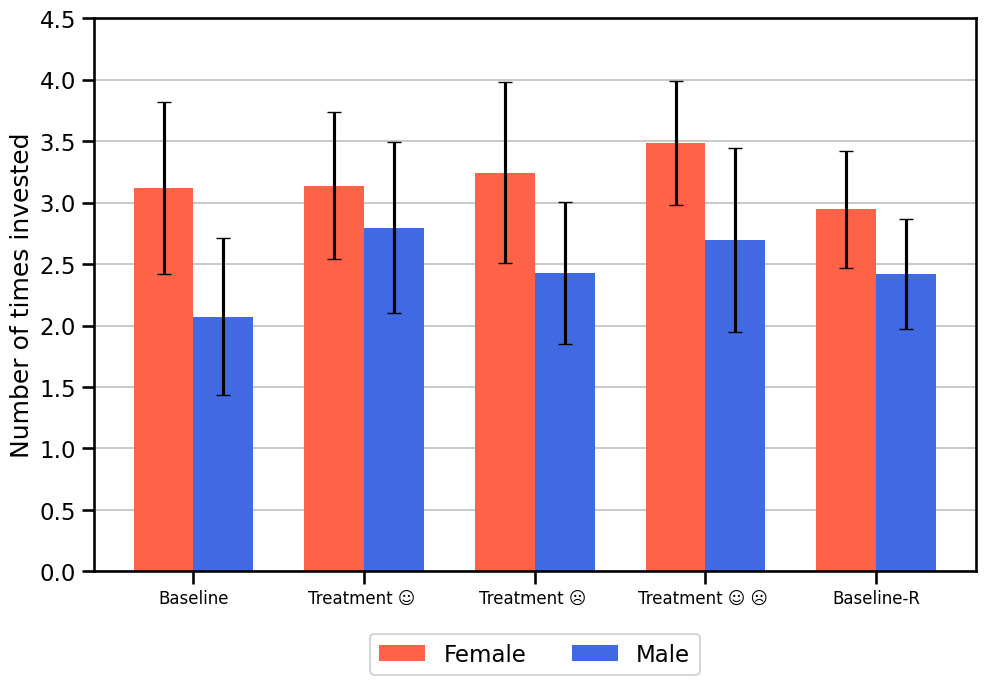

In [56]:
treatments = means.index
x = np.arange(len(treatments))
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(10.2, 7.2), dpi=100)
# Female bars on the left
ax.bar(
    x - width/2,
    means['Female'],
    width,
    yerr=err['Female'],
    capsize=5,
    label='Female',
    color='tomato',
    zorder=2,
)

# Male bars on the right
ax.bar(
    x + width/2,
    means['Male'],
    width,
    yerr=err['Male'],
    capsize=5,
    label='Male',
    color='royalblue',
    zorder=2,
)

ax.grid(axis='y', linestyle='-', linewidth=0.3, color='black', zorder=1)
ax.set_xticks(x)
ax.set_ylim(0, 4.5)
ax.set_xticklabels(treatment_emojis, fontsize=12)
ax.set_ylabel('Number of times invested')
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


fig.savefig('output_fig/Figure A3(b).png', bbox_inches='tight', dpi=150)



# Figure A5 : Gender-gap across treatment over round - Phase 2

In [57]:
full_data


,phase,treatment,session_id,period,group,case_id,female,decision_1,n_invest_subject,group_success1,session_size,num_fem_session
0,2.0,Baseline,7.0,1,3,76.0,Female,0,1.0,1,18.0,8.0
1,2.0,Baseline,7.0,2,6,76.0,Female,0,1.0,1,18.0,8.0
2,2.0,Baseline,7.0,3,4,76.0,Female,0,1.0,1,18.0,8.0
3,2.0,Baseline,7.0,4,1,76.0,Female,0,1.0,1,18.0,8.0
4,2.0,Baseline,7.0,5,4,76.0,Female,0,1.0,1,18.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4675,2.0,BaselineR,57.0,6,5,753.0,Female,0,5.0,0,18.0,9.0
4676,2.0,BaselineR,57.0,7,5,753.0,Female,0,5.0,1,18.0,9.0
4677,2.0,BaselineR,57.0,8,2,753.0,Female,1,5.0,1,18.0,9.0
4678,2.0,BaselineR,57.0,9,3,753.0,Female,1,5.0,1,18.0,9.0


In [58]:
fig3b = full_data.groupby(['treatment','period', 'female'],observed=True).agg({'decision_1':'mean'})
fig3b.reset_index(level=['treatment','period','female'],inplace=True)
print(fig3b)

    treatment  period  female  decision_1
0    Baseline       1    Male    0.268293
1    Baseline       1  Female    0.382353
2    Baseline       2    Male    0.243902
3    Baseline       2  Female    0.382353
4    Baseline       3    Male    0.195122
..        ...     ...     ...         ...
95  BaselineR       8  Female    0.305556
96  BaselineR       9    Male    0.246914
97  BaselineR       9  Female    0.208333
98  BaselineR      10    Male    0.209877
99  BaselineR      10  Female    0.236111

[100 rows x 4 columns]


In [59]:
positive_a = "(b) Treatment" + emoji.emojize(" :smiling_face: ")
negative_a = "(c) Treatment" + emoji.emojize(" :frowning_face: ")
positive_negative_a = "(d) Treatment" + emoji.emojize(" :smiling_face:") + emoji.emojize(" :frowning_face: ")
treatment_emojis = ['Baseline',positive_a, negative_a, positive_negative_a, 'Baseline-R']

In [60]:

# 1. Aggregate your data by treatment, period, and female
fig3b = (
    full_data
    .groupby(['treatment', 'period', 'female'], observed=True)
    .agg(decision_1=('decision_1', 'mean'))
    .reset_index()
)
fig3b

,treatment,period,female,decision_1
0,Baseline,1,Male,0.268293
1,Baseline,1,Female,0.382353
2,Baseline,2,Male,0.243902
3,Baseline,2,Female,0.382353
4,Baseline,3,Male,0.195122
...,...,...,...,...
95,BaselineR,8,Female,0.305556
96,BaselineR,9,Male,0.246914
97,BaselineR,9,Female,0.208333
98,BaselineR,10,Male,0.209877


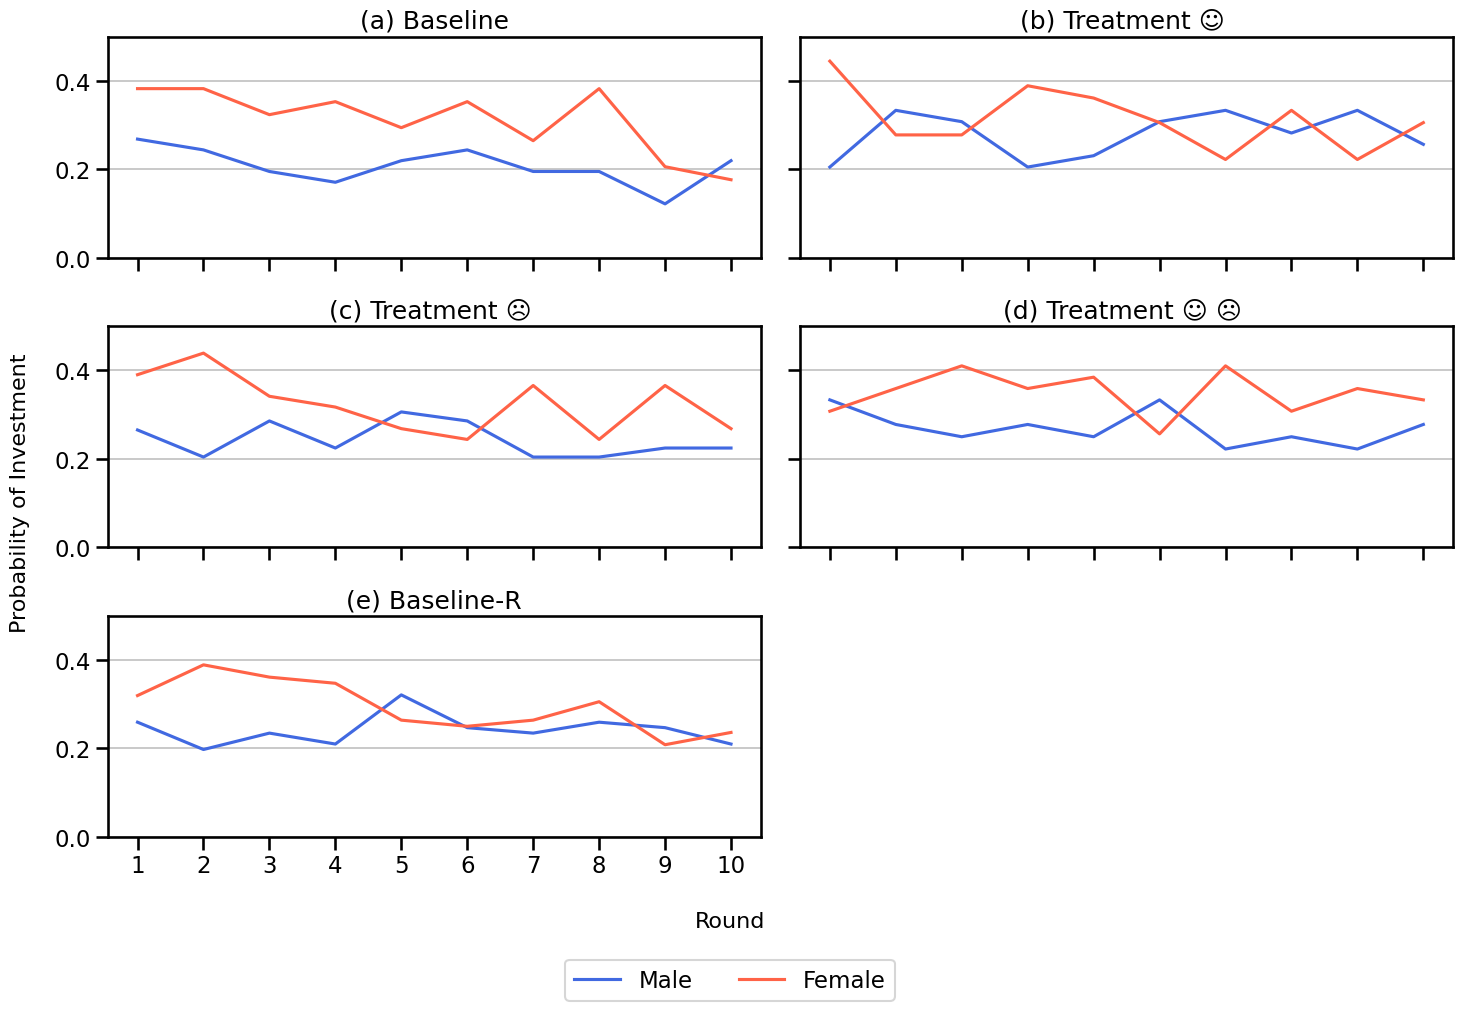

In [61]:
from matplotlib.lines import Line2D
# 2. Define treatments and titles
treatments = ['Baseline', 'Positive', 'Negative', 'Pos_Neg', 'BaselineR']
titles     = ['(a) Baseline', positive_a, negative_a, positive_negative_a, '(e) Baseline-R']

# 3. Create subplot grid
fig, axes = plt.subplots(
    nrows=3, ncols=2,
    figsize=(15, 10.2), dpi=100,
    sharex=True, sharey=True
)
axes = axes.flatten()

# 4. Plot each panel without individual legends or axis labels
for ax, treat, title in zip(axes, treatments, titles):
    data_sub = fig3b[fig3b['treatment'] == treat]
    sns.lineplot(
        x='period', 
        y='decision_1', 
        data=data_sub,
        hue='female', 
        palette=['royalblue', 'tomato'],
        legend=False, 
        ax=ax,
        marker=None  # no markers
    )
    ax.set_title(title)
    ax.set_ylim(0, 0.5)
    ax.set_xticks(range(1, 11))
    ax.grid(axis='y', color='black', linestyle='-', linewidth=0.3)
    # Remove per-panel labels
    ax.set_xlabel('')
    ax.set_ylabel('')

# 5. Turn off any unused subplot (last panel if empty)
if len(treatments) < len(axes):
    axes[-1].axis('off')

# 6. Add shared axis labels using supxlabel and supylabel
fig.supxlabel('Round', y=0.07, fontsize=16)
fig.supylabel('Probability of Investment', x=0.02, fontsize=16)

male_handle = Line2D([0], [0], color='royalblue',  linestyle='-', label='Male')
female_handle = Line2D([0], [0], color='tomato',  linestyle='-', label='Female')

# 7. Place a single legend at the bottom of the figure
fig.legend(
    handles=[male_handle, female_handle],
    loc='lower center', ncol=2, frameon=True,
    bbox_to_anchor=(0.5, -0.01)
)
# 8. Layout adjustment and save
plt.tight_layout(rect=[0, 0.05, 1, 1])

fig.savefig('output_fig/FigureA5.png', dpi=200)
plt.show()